In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.sandbox.regression.predstd import wls_prediction_std

## Задание 1.
#### Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков

In [2]:
water_df = pd.read_csv('./Data/water.csv', usecols=[1, 2, 3, 4])

In [3]:
water_df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


#### 1. Точечный график взаимосвязи, видим что наблюдается отрицательная корреляция между двумя признаками

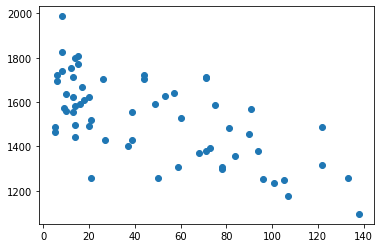

In [4]:
plt.scatter(water_df['hardness'], water_df['mortality'])

#### 2. Коэффициенты корреляции Спирмена (видим отрицательную корреляцию)

In [5]:
water_df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


#### 3. Коэффициенты корреляции Пирсона (видим отрицательную корреляцию)

In [6]:
water_df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


### Модель линейной регрессии.

In [7]:
X = water_df[['hardness']]
y = water_df[['mortality']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
X_const = sm.add_constant(X_train)

In [11]:
model = sm.OLS(y_train, X_const)
results = model.fit()

#### Коэффициент детерминации

In [12]:
results.rsquared

0.3967890100912279

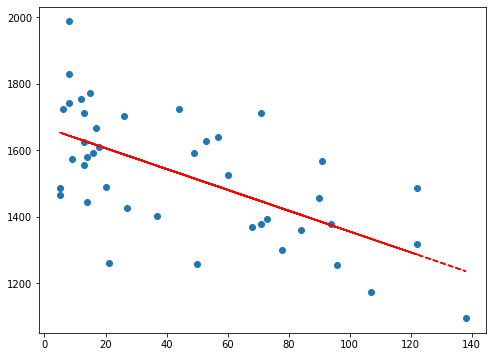

In [13]:
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax= plt.subplots(figsize=(8, 6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label='data')
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--', label='OLS')

#### Графики остатков

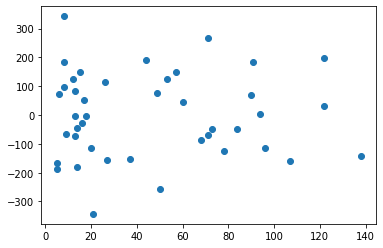

In [14]:
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 0., 1., 0., 2., 5., 3., 2., 5., 3., 2., 2., 5., 3., 2., 4., 0.,
        1., 0., 1.]),
 array([-3.43207209e+02, -3.08892795e+02, -2.74578382e+02, -2.40263968e+02,
        -2.05949554e+02, -1.71635140e+02, -1.37320726e+02, -1.03006312e+02,
        -6.86918979e+01, -3.43774840e+01, -6.30700817e-02,  3.42513439e+01,
         6.85657578e+01,  1.02880172e+02,  1.37194586e+02,  1.71509000e+02,
         2.05823414e+02,  2.40137827e+02,  2.74452241e+02,  3.08766655e+02,
         3.43081069e+02]),
 <BarContainer object of 20 artists>)

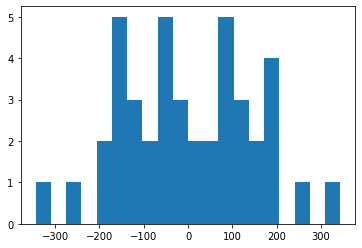

In [15]:
plt.hist(results.resid, bins=20)

### Ответ на вопрос:
Исходя из значения корреляции и scatter plot, мы можем увидеть слабую отрицательную взаимосвязь.

## Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы

Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

### South Region

In [16]:
south_water_df = water_df[water_df['location'] == 'South']
south_water_df.head(1)

,location,town,mortality,hardness
0,South,Bath,1247,105


### 1. График взаимосвязи

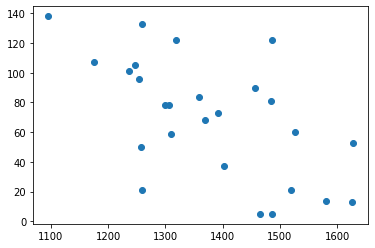

In [17]:
plt.scatter(south_water_df['mortality'], south_water_df['hardness'])

### 2. Коэффициент корреляции Пиросона

In [18]:
south_water_df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


### 3. Коэффициент корреляции Спирмена

In [26]:
south_water_df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


### Модель линейной регрессии для южного региона

In [27]:
X = south_water_df[['hardness']]
y = south_water_df[['mortality']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
X_const = sm.add_constant(X_train)

In [30]:
model = sm.OLS(y_train, X_const)
results = model.fit()

#### Коэффициент детерминации

In [31]:
results.rsquared

0.636380830887719

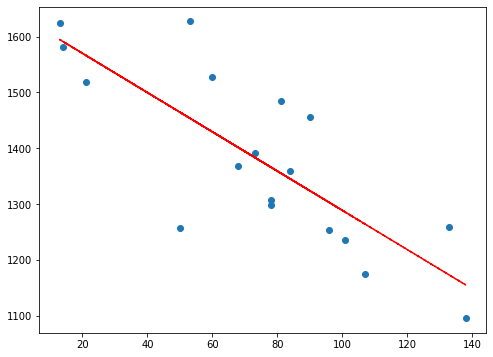

In [33]:
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax= plt.subplots(figsize=(8, 6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label='data')
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--', label='OLS')

#### Графики остатков

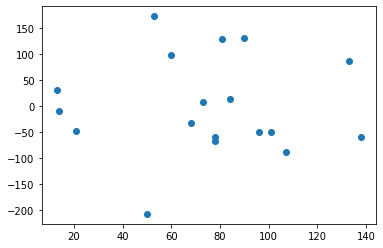

In [34]:
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 0., 0., 0., 0., 0., 1., 3., 3., 1., 1., 2., 1., 0., 0., 1., 1.,
        2., 0., 1.]),
 array([-207.54899972, -188.52198534, -169.49497096, -150.46795658,
        -131.4409422 , -112.41392781,  -93.38691343,  -74.35989905,
         -55.33288467,  -36.30587029,  -17.2788559 ,    1.74815848,
          20.77517286,   39.80218724,   58.82920162,   77.856216  ,
          96.88323039,  115.91024477,  134.93725915,  153.96427353,
         172.99128791]),
 <BarContainer object of 20 artists>)

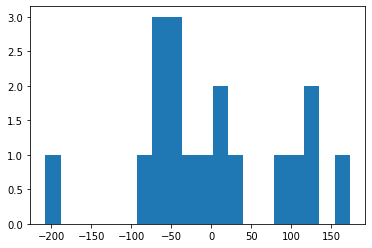

In [35]:
plt.hist(results.resid, bins=20)

Вывод: присутстует отрицаетльная взаимосвзять

### North Region

In [36]:
north_water_df = water_df[water_df['location'] == 'North']
south_water_df.head(1)

,location,town,mortality,hardness
0,South,Bath,1247,105


### 1. График взаимосвязи

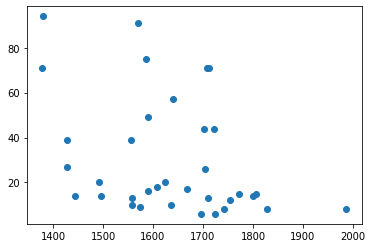

In [37]:
plt.scatter(north_water_df['mortality'], north_water_df['hardness'])

### 2. Коэффициент корреляции Пиросона

In [38]:
north_water_df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


### 3. Коэффициент корреляции Спирмена

In [39]:
north_water_df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


### Модель линейной регрессии для южного региона

In [40]:
X = north_water_df[['hardness']]
y = north_water_df[['mortality']]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [42]:
X_const = sm.add_constant(X_train)

In [43]:
model = sm.OLS(y_train, X_const)
results = model.fit()

#### Коэффициент детерминации

In [44]:
results.rsquared

0.19322282610033525

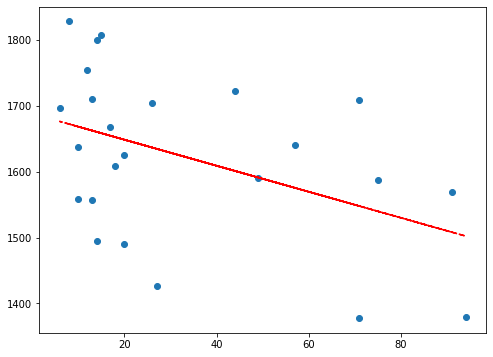

In [45]:
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax= plt.subplots(figsize=(8, 6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label='data')
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--', label='OLS')

#### Графики остатков

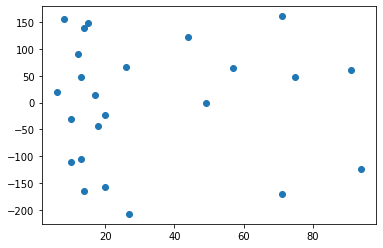

In [46]:
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 0., 3., 0., 1., 2., 0., 0., 1., 2., 0., 2., 1., 2., 3., 0., 1.,
        1., 1., 3.]),
 array([-207.77494801, -189.32585104, -170.87675407, -152.42765709,
        -133.97856012, -115.52946315,  -97.08036618,  -78.6312692 ,
         -60.18217223,  -41.73307526,  -23.28397829,   -4.83488132,
          13.61421566,   32.06331263,   50.5124096 ,   68.96150657,
          87.41060354,  105.85970052,  124.30879749,  142.75789446,
         161.20699143]),
 <BarContainer object of 20 artists>)

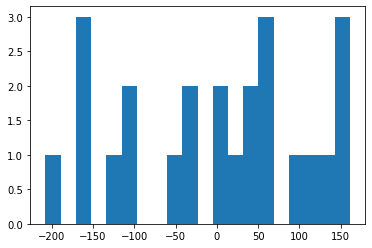

In [47]:
plt.hist(results.resid, bins=20)

Вывод: в этом регионе очень слабая взаимосвзять между признаками